# SHAP explainer Demo
using the parity-fairness package

In [1]:
# install parity-fairness package
# pip install parity-fairness

In [2]:
## Import Libraries

# Fairness metrics and mitigation from the parity-fairness package
from parity.explainer import *

# For Exploratory Data Analysis
import pandas_profiling
from pandas_profiling import ProfileReport

%matplotlib inline
# Data manipulation libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Loads Model
import joblib 

# Design libraries
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# machine learning model packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report

### Load Data

In [4]:
data = pd.read_csv("data/census.csv")

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Define Features and Target

In [6]:
X = data.drop('income', axis=1)
X_onehot = pd.get_dummies(X)
y = data[['income']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_onehot, y, train_size=0.80, random_state=42)

In [8]:
rf = RFC(n_estimators=50, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
y_pred = rf.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.97      0.90      7479
        >50K       0.80      0.42      0.55      2290

    accuracy                           0.84      9769
   macro avg       0.82      0.70      0.73      9769
weighted avg       0.84      0.84      0.82      9769



### Sklearn Feature Importances

In [11]:
feature_importance_df = feature_importances(rf, X_train)

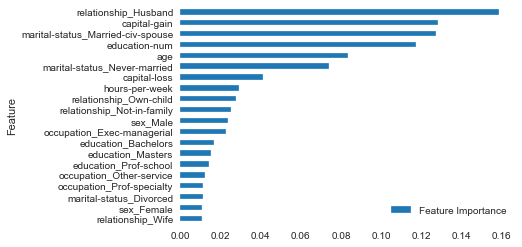

In [12]:
# Plot feature importance (top 20)
ax = feature_importance_df[:20].plot(kind='barh', )
plt.gca().invert_yaxis()

ax

# SHAP Explainer

### Impact on Output

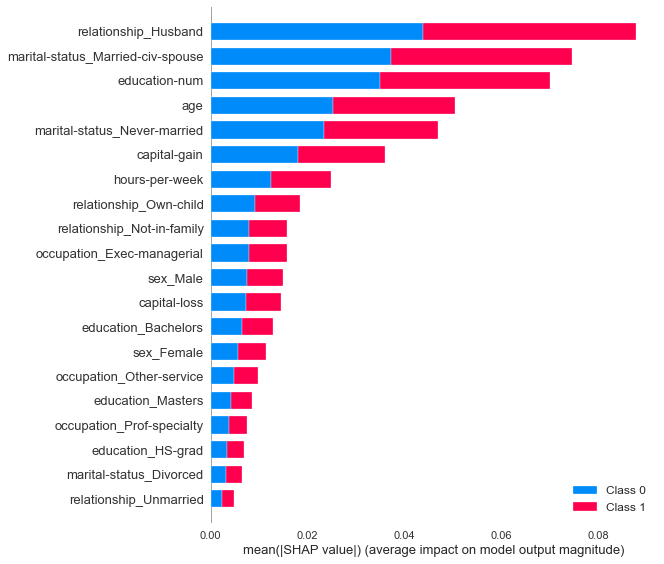

In [13]:
shap_values = shap_feature_explainer(rf, X_train)

### GDPR Regulation

Another example of SHAP values is for GDPR regulation, one should be able to give detailed information as to why a specific prediction was made.

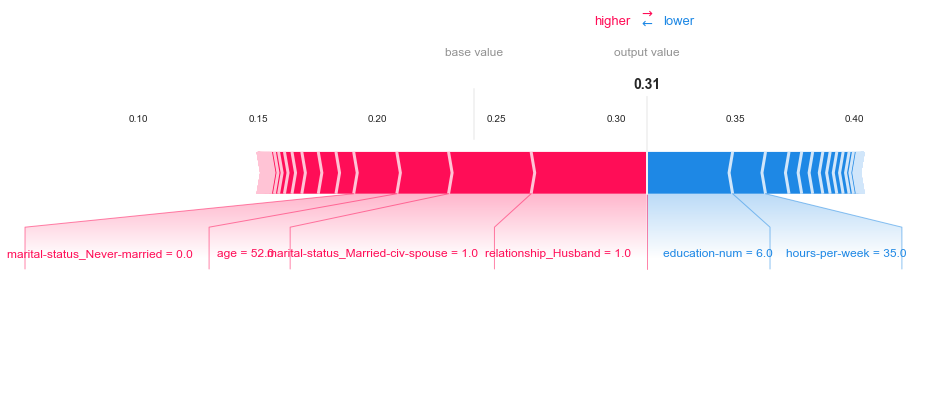

Which features caused this specific prediction? features in red increased the prediction, in blue decreased them


In [14]:
#  Computes prediction causes for each feature from model given a specific row in the data.
plot_prediction_causes(rf, X_train, shap_values, index=1)

print('Which features caused this specific prediction? features in red increased the prediction, in blue decreased them')

### Prediction Causes

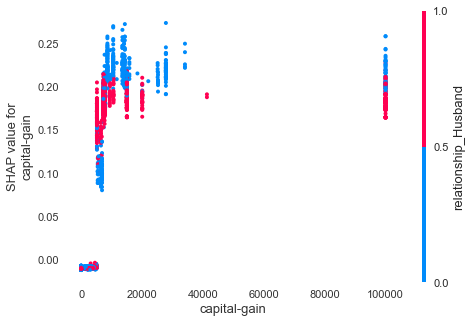

In [15]:
# Plots the interaction effects of SHAP values of features with each other wrt to the target variable.
dependence_plots(X_train, shap_values, rank=5)